# <font face="Times New Roman" size=10> Starbucks Capstone Project

### <font face="Times New Roman" size=4.5 color = '#0099ff' > Octorber 10,2020

# 1.1   Domain Background <font face="Times New Roman" >

* Starbucks, an American Coffee Company, which offers discount to mobile users who purchase items through the mobile app. As a retail company that sells products to its consumers, increasing sales would be a major concern for them, and as a businesses look forward to increasing sales and revenue every year, establishing means to help with this using technology would be at the top of their list. 
* Using a simplified version of the real Starbucks app based on a simulator we seek to be able to determine demographic groups of consumers and also how they best respond to offers.

# 1.2   Problem Statement<font face="Times New Roman" >

* The problem this project proposes to solve is finding the most appropriate offer for each one of the customers, which means finding the offer that is more likely to lead the customer to buy Starbucks products.
In the context of this project, an appropriate offer is that one where the customer sees the offer received and buys products under its influence,completing the offer lifecycle.
* If a customer does not see an offer, it is not an appropriate one. If he or
she sees the offer but does not complete it, it is not appropriate as well, since it
did not lead the consumer to buy products. Similarly, if the customer buys
some products, completes an offer, and receives a reward before visualizing that
offer, it is not considered effective because the customer was not under the
influence of that offer when decided to make a purchase.

# 1.3  Datasets and Inputs<font face="Times New Roman" >

In [2]:
import pandas as pd
import numpy as np
import math
import json

%matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record


In [3]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [4]:
profile

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [5]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


### Data Inputs

Although there are only three types of offer(bogo, discount, informational), acutually some people complete the transaction without refering to the offers. In order to exclude this condition, we have to consider the "none" type of offer. The histogram of offer type shows the amount of each certain offer. 

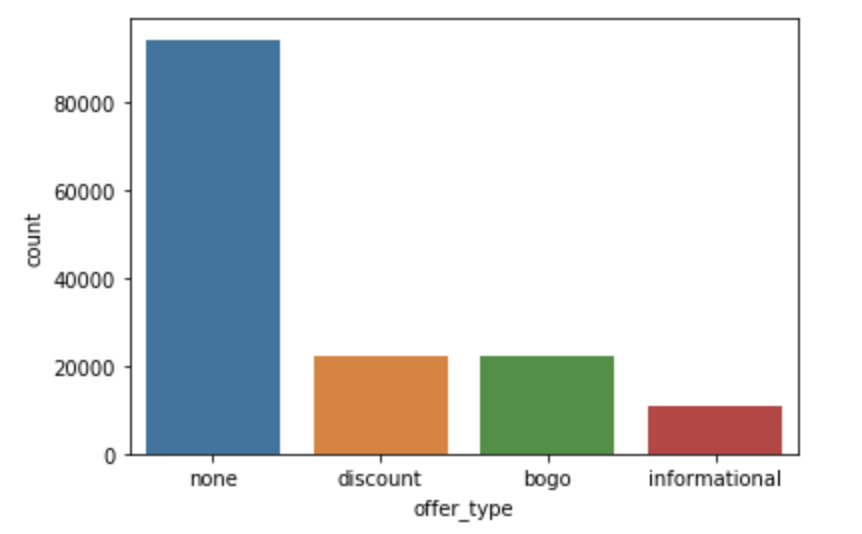

In [12]:
from IPython.display import Image
Image('offer_type.png',width=600,height=400)

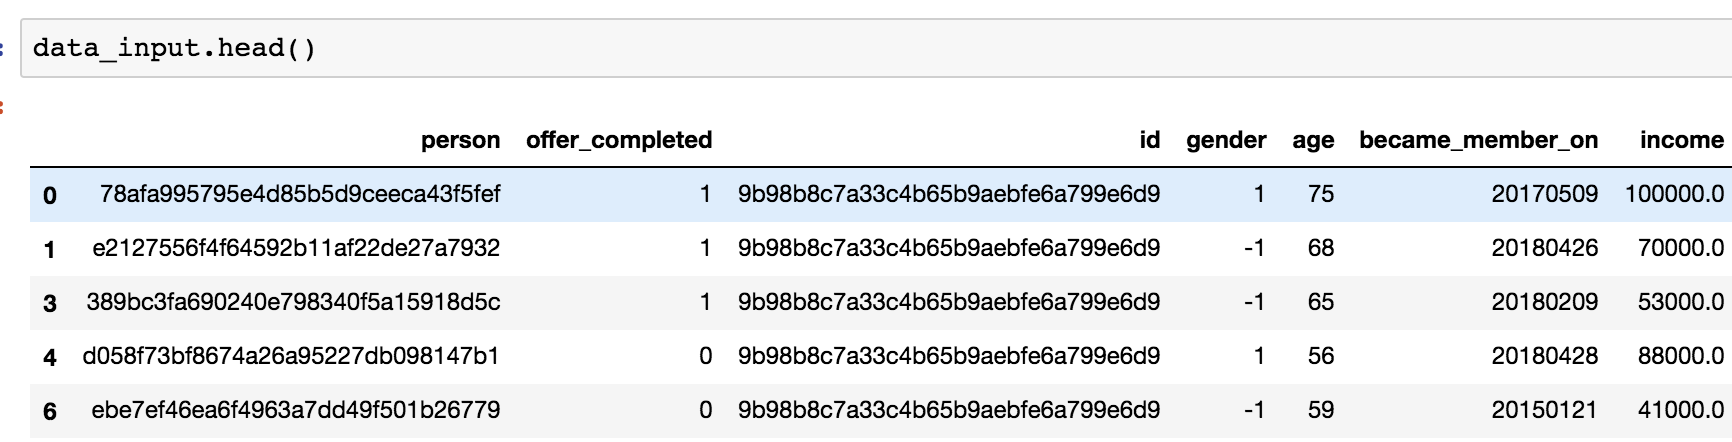

In [19]:
Image('input2.png')

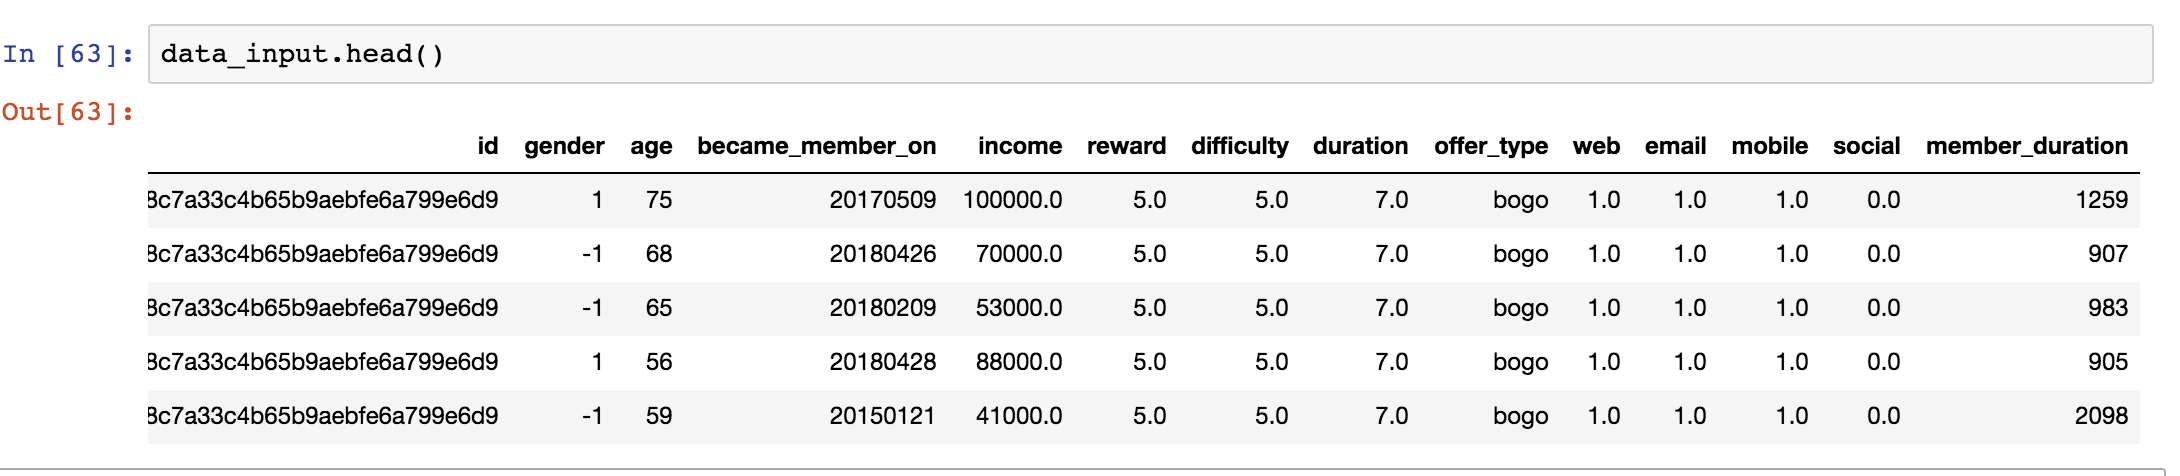

In [18]:
Image('input1.png')

# 1.4  Solution Statement<font face="Times New Roman" >

A solution I propose would be to apply a Classification Machine Learning model after thorough
analysis on demography data and transactions to determine if a user would respond to a particular
offer or not.

With the information that there are 4 offers:
* Bogo
* Informational
* Discount
* None

This makes our model a multi-label classification model which would be useful in determine which of the offers (classes) listed above that a potential consumer would respond best to. With the knowledge that some consumers do not purchase an item with an offer in mind, they
do not need to recieve any offer, is the reason why None is also listed as a class.

# 1.5  Benchmark Model <font face="Times New Roman" >

* In the terminology of machine learning, classification is considered an instance of supervised learning, i.e., learning where a training set of correctly identified observations is available.
* One of the basic algorithms of classification is logistic regression. Therefore, I would like to use logistic regression as my benchmark model.

  ###     Logistic Regression
  

* Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression. (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit, hence the alternative names. Analogous models with a different sigmoid function instead of the logistic function can also be used, such as the probit model; the defining characteristic of the logistic model is that increasing one of the independent variables multiplicatively scales the odds of the given outcome at a constant rate, with each independent variable having its own parameter; for a binary dependent variable this generalizes the odds ratio.[1]



# 1.6  Evaluation Metrics<font face="Times New Roman" >

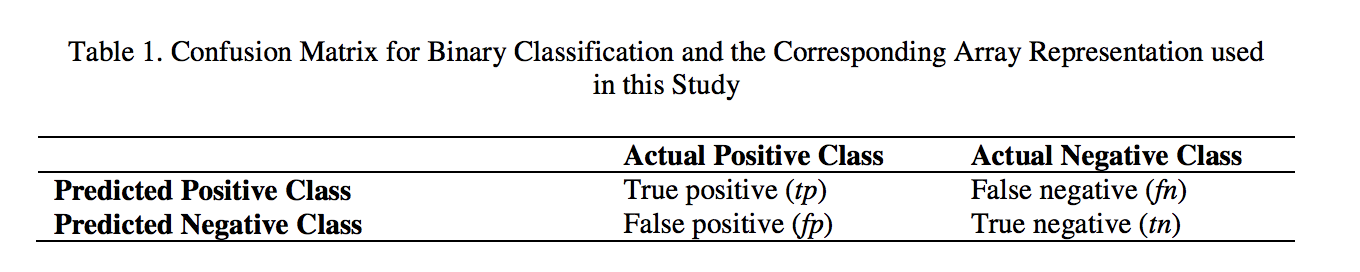

In [20]:
Image('metrics.png')

### 1.6.1 Accuracy

In general, the accuracy metric measures the ratio of correct predictions over the total number of instances evaluated. 
* accuracy = (tp + tn) / (tp + fp + fn + tn)

### 1.6.2 F-Measure (FM)

Precision is used to measure the positive patterns that are correctly predicted from the total predicted patterns in a positive class. 
* precision = tp / (tp + fp)

Recall is used to measure the fraction of positive patterns that are correctly classified.
* recall = tp / (tp + tn)

F-Measure (FM): This metric represents the harmonic mean between recall and precision values 
* fm =  2 * precision * recall / (precision + recall)

# 1.7  Project Design<font face="Times New Roman" >

### 1.7.1 Data Loading&cleaning

I would proceed to merge datasets together, transcript.json with both the
porfolio.json and profile.json, as this all hold data that describe entities describe in the transcript.

### 1.7.2 Data Analysis & Visualizations

### 1.7.3 Model Selection

There are 5 machine learning models for classification that will be examined thoroughly. These are:

* Logistic Regression
* Decision Tree
* Adaptive Boosting
* Random Forest
* XGB Classifier

For each of the model, the cross validation technique of 10-fold is used to calculate the accuracy of each model. These values are going to be shown in a DataFrame model_df. The dataframe is sorted based on the model test accuracy (the highest at the top).

### 1.7.4 Model Tuning

### 1.7.5 Conclusion